In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import holidays

/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv("../data/final_tables/isne/isne.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
# Select the country for which you want to check holidays
us_holidays = holidays.UnitedStates()
# Create a new column in your DataFrame to indicate if a date is a holiday
df['is_holiday'] = df['timestamp'].apply(lambda x: 1 if x in us_holidays else 0)
df.head()

,timestamp,Demand (MWh),Demand Forecast (MWh),Net Generation (MWh),Region,Normalized Demand,temperature,humidity,cloudcover,windspeed,day_of_week,hour,month,is_holiday
0,2015-07-01 01:00:00,12583.0,11810.0,11322.0,isne,-0.444224,18.2,85,47,8.4,2,1,7,0
1,2015-07-01 02:00:00,12349.0,11190.0,11376.0,isne,-0.536452,17.5,89,30,9.7,2,2,7,0
2,2015-07-01 03:00:00,12445.0,10860.0,11305.0,isne,-0.498615,17.2,90,45,9.6,2,3,7,0
3,2015-07-01 04:00:00,12385.0,10760.0,11303.0,isne,-0.522263,16.9,91,55,9.5,2,4,7,0
4,2015-07-01 05:00:00,12387.0,11200.0,11460.0,isne,-0.521475,16.4,92,61,9.3,2,5,7,0


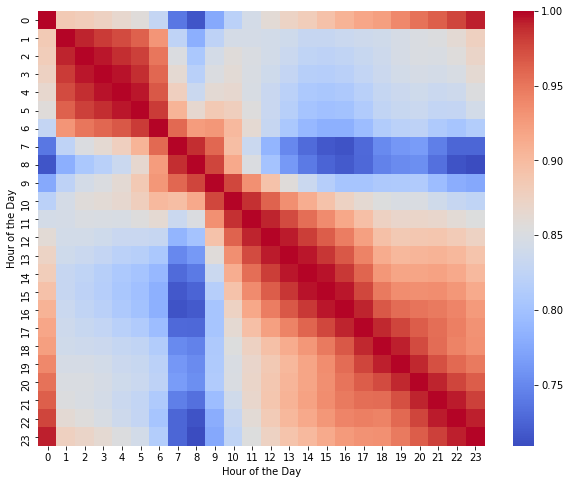

In [3]:
# Prepare a DataFrame to store correlations
correlation_matrix = pd.DataFrame(index=range(24), columns=range(24))

# Calculate correlations
for i in range(24):
    for j in range(24):
        hourly_data_i = df[df['hour'] == i]['Normalized Demand']
        hourly_data_j = df[df['hour'] == j]['Normalized Demand']
        correlation_matrix.loc[i, j] = np.corrcoef(np.array(hourly_data_i), np.array(hourly_data_j))[0,1]

# Convert the correlation matrix to numeric for plotting
correlation_matrix = correlation_matrix.astype(float)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
# plt.title('Hourly Load Value Correlation Heatmap')
plt.xlabel('Hour of the Day')
plt.ylabel('Hour of the Day')
plt.show()


Text(0.5, 0, 'Temperature (Celsius)')

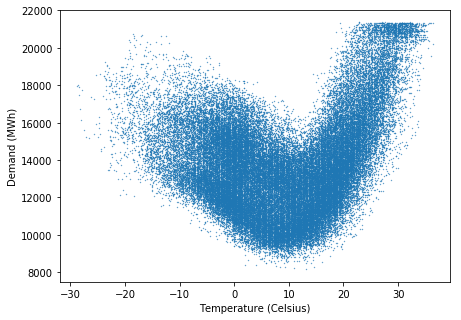

In [4]:
plt.figure(figsize=(7, 5))
plt.scatter(df["temperature"], df['Demand (MWh)'], s=0.1)
plt.ylabel('Demand (MWh)')
plt.xlabel('Temperature (Celsius)')

Text(0.5, 0, 'Percent Humidity')

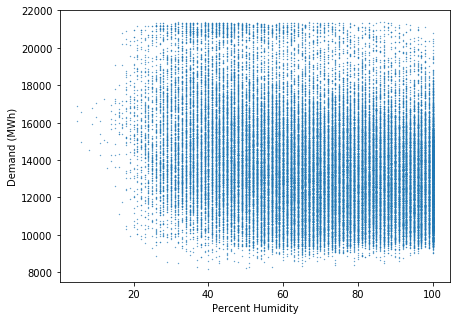

In [5]:
plt.figure(figsize=(7, 5))
plt.scatter(df["humidity"], df['Demand (MWh)'], s=0.1)
plt.ylabel('Demand (MWh)')
plt.xlabel('Percent Humidity')

Text(0.5, 0, 'Windspeed (km/h)')

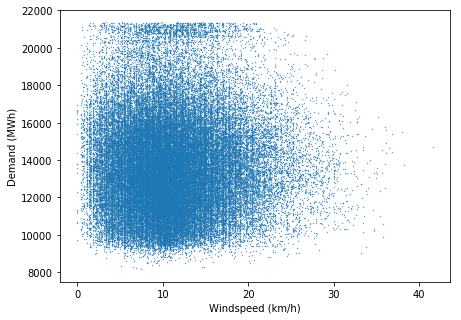

In [6]:
plt.figure(figsize=(7, 5))
plt.scatter(df["windspeed"], df['Demand (MWh)'], s=0.1)
plt.ylabel('Demand (MWh)')
plt.xlabel('Windspeed (km/h)')

Text(0.5, 0, 'Percent Cloud Cover')

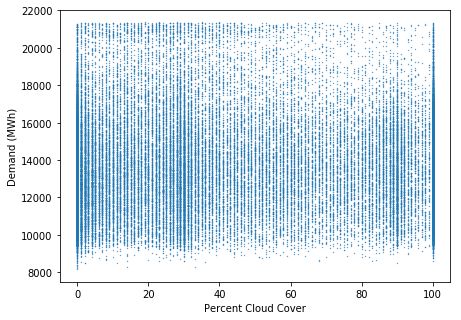

In [7]:
plt.figure(figsize=(7, 5))
plt.scatter(df["cloudcover"], df['Demand (MWh)'], s=0.1)
plt.ylabel('Demand (MWh)')
plt.xlabel('Percent Cloud Cover')

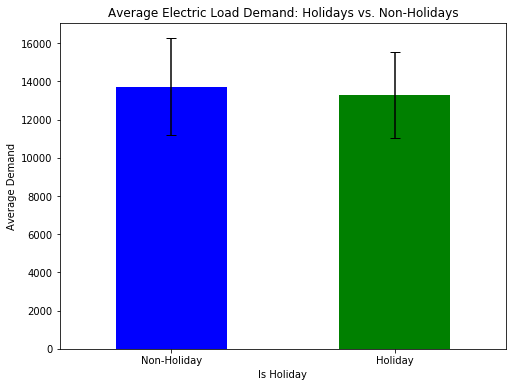

In [8]:
# Group by the holiday status and calculate the average demand and standard deviation
grouped = df.groupby('is_holiday')['Demand (MWh)']
average_demand = grouped.mean()
std_demand = grouped.std()

# Plotting
plt.figure(figsize=(8, 6))
average_demand.plot(kind='bar', yerr=std_demand, color=['blue', 'green'], capsize=5)
plt.title('Average Electric Load Demand: Holidays vs. Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Average Demand')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

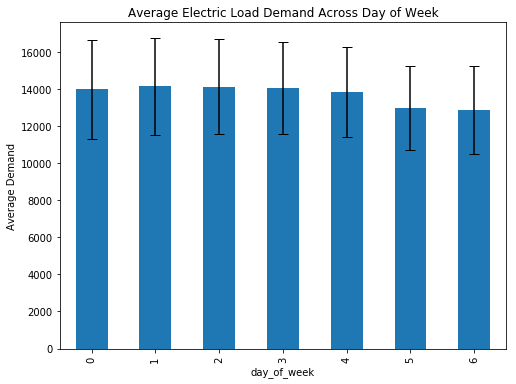

In [9]:
# Group by the holiday status and calculate the average demand and standard deviation
grouped = df.groupby('day_of_week')['Demand (MWh)']
average_demand = grouped.mean()
std_demand = grouped.std()

# Plotting
plt.figure(figsize=(8, 6))
average_demand.plot(kind='bar', yerr=std_demand, capsize=5)
plt.title('Average Electric Load Demand Across Day of Week')
# plt.xlabel('Is Holiday')
plt.ylabel('Average Demand')
# plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

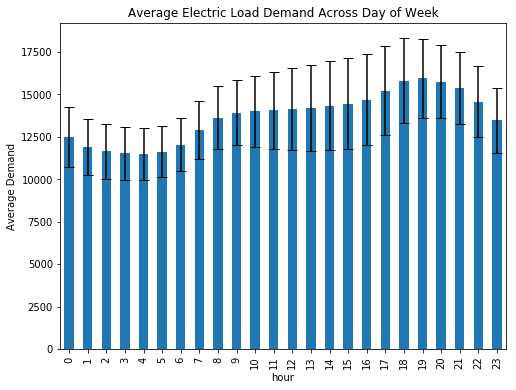

In [10]:
# Group by the holiday status and calculate the average demand and standard deviation
grouped = df.groupby('hour')['Demand (MWh)']
average_demand = grouped.mean()
std_demand = grouped.std()

# Plotting
plt.figure(figsize=(8, 6))
average_demand.plot(kind='bar', yerr=std_demand, capsize=5)
plt.title('Average Electric Load Demand Across Day of Week')
# plt.xlabel('Is Holiday')
plt.ylabel('Average Demand')
# plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

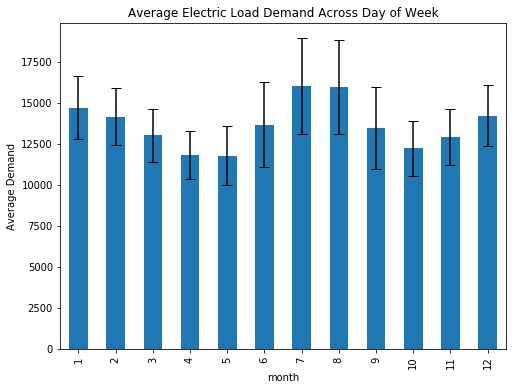

In [11]:
# Group by the holiday status and calculate the average demand and standard deviation
grouped = df.groupby('month')['Demand (MWh)']
average_demand = grouped.mean()
std_demand = grouped.std()

# Plotting
plt.figure(figsize=(8, 6))
average_demand.plot(kind='bar', yerr=std_demand, capsize=5)
plt.title('Average Electric Load Demand Across Day of Week')
# plt.xlabel('Is Holiday')
plt.ylabel('Average Demand')
# plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

In [12]:
df.groupby('is_holiday').head()

,timestamp,Demand (MWh),Demand Forecast (MWh),Net Generation (MWh),Region,Normalized Demand,temperature,humidity,cloudcover,windspeed,day_of_week,hour,month,is_holiday
0,2015-07-01 01:00:00,12583.0,11810.0,11322.0,isne,-0.444224,18.2,85,47,8.4,2,1,7,0
1,2015-07-01 02:00:00,12349.0,11190.0,11376.0,isne,-0.536452,17.5,89,30,9.7,2,2,7,0
2,2015-07-01 03:00:00,12445.0,10860.0,11305.0,isne,-0.498615,17.2,90,45,9.6,2,3,7,0
3,2015-07-01 04:00:00,12385.0,10760.0,11303.0,isne,-0.522263,16.9,91,55,9.5,2,4,7,0
4,2015-07-01 05:00:00,12387.0,11200.0,11460.0,isne,-0.521475,16.4,92,61,9.3,2,5,7,0
47,2015-07-03 00:00:00,13356.0,13250.0,12292.0,isne,-0.139553,19.0,68,31,5.6,4,0,7,1
48,2015-07-03 01:00:00,12463.0,12130.0,11312.0,isne,-0.491520,17.5,72,11,6.0,4,1,7,1
49,2015-07-03 02:00:00,11827.0,11340.0,11003.0,isne,-0.742194,16.4,75,27,7.1,4,2,7,1
50,2015-07-03 03:00:00,11543.0,10850.0,10788.0,isne,-0.854130,15.6,76,30,7.7,4,3,7,1
51,2015-07-03 04:00:00,11491.0,10560.0,10781.0,isne,-0.874625,15.0,75,30,10.5,4,4,7,1


In [13]:
start=45000
df[start:start+240]

,timestamp,Demand (MWh),Demand Forecast (MWh),Net Generation (MWh),Region,Normalized Demand,temperature,humidity,cloudcover,windspeed,day_of_week,hour,month,is_holiday
45000,2020-08-18 01:00:00,12133.0,12110.0,9377.0,isne,-0.621587,19.2,79,100,10.4,1,1,8,0
45001,2020-08-18 02:00:00,11583.0,11570.0,9244.0,isne,-0.838364,18.2,84,73,10.5,1,2,8,0
45002,2020-08-18 03:00:00,11485.0,11240.0,8919.0,isne,-0.876990,17.5,91,50,11.9,1,3,8,0
45003,2020-08-18 04:00:00,11338.0,11070.0,9030.0,isne,-0.934928,17.4,94,54,11.1,1,4,8,0
45004,2020-08-18 05:00:00,11227.0,11220.0,9144.0,isne,-0.978678,17.1,95,49,8.2,1,5,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45235,2020-08-27 20:00:00,14977.0,15360.0,12634.0,isne,0.499348,16.3,100,100,4.7,3,20,8,0
45236,2020-08-27 21:00:00,14554.0,15080.0,12187.0,isne,0.332627,16.6,96,100,6.5,3,21,8,0
45237,2020-08-27 22:00:00,13732.0,14060.0,11264.0,isne,0.008644,16.5,97,52,2.9,3,22,8,0
45238,2020-08-27 23:00:00,12738.0,12830.0,10063.0,isne,-0.383132,16.2,97,40,3.5,3,23,8,0


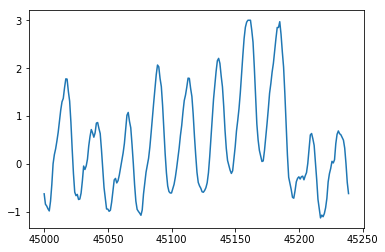

In [14]:
plt.plot(df['Normalized Demand'][start:start+240])

In [15]:
np.min(df['Normalized Demand']), np.max(df['Normalized Demand']), np.std(df['Normalized Demand'])

(-1.865468080157889, 3.000152451712088, 0.9999923993387386)